# Experiment stack
The experiment stack for every aspect of the experiment. Using Ejtemaee et al. paper "Optimization of Yb+ Flourescence and hyperfine-qubit detection"


### $^{171}Yb^+$ structure ###
<p align="center">
    <img src="img/Ybstructure.PNG"  height="300" >
    <img src="img/171Yb_cooling_white.png" height="300">
    <img src="img/171Yb_clebsche_gorden_coeffs.PNG" height="300">
</p>


This is the general structure of $^{171}Yb^+$ ions. I will use this to diagramatically show what each part of the experiment is doing.

The cooling cycle is also shown on the two right images. The very right image shows the Clebsch Gordan Coefficiencients for the transitions.

This experiment stack mostly uses the solution to the Lindblad master equation for the $^2S_{1/2}\leftrightarrow^2P_{1/2}$ optical transition using linearly polarised light travelling perpendicular to the $B_z$ quantization axis. The solution is

\begin{equation}
    \mathcal{P}_{p0} = \frac{3}{4}\frac{\cos^2\theta_{BE}\sin^2\theta_{BE}}{1 + 3 \cos^2\theta_{BE}}\frac{\frac{\Omega^2}{3}}{\Delta^2 + \left(\frac{\Gamma_{171}}{2}\right)^2}
\end{equation}

where 

\begin{equation}
    \left(\frac{\Gamma_{171}}{2}\right)^2 = \left(\frac{\gamma}{2}\right)^2 + \frac{\Omega^2}{3}\cos^2\theta_{BE}\frac{1-3\cos^2\theta_{BE}}{1+3\cos^2\theta_{BE}} + \frac{\cos^2\theta_{BE}}{1+3\cos^2\theta_{BE}}\left(\frac{\Omega^4}{36\delta_B^2} + 4\delta_{BE}^2\right).
\end{equation}

is the effective linewidth. $\Omega$ is the Rabi rate which is defined as

\begin{equation}
    \Omega = \Gamma\sqrt{\frac{I}{2I_0}}.
\end{equation}

$\gamma$ is the linewidth of the transition. Decay from $^2P_{1/2}\, F=0$ state to the low lying $^2D_{3/2} \, F=1$ state as well as the counter effect of the 935 nm repump laser is accounted for using

\begin{equation}
    P_{p0}^{(r)} = \frac{\mathcal{P}_{p0}(\alpha=0)}{1 + \xi \mathcal{P}_{p0}(\alpha=0)},
\end{equation}

where the repump factor $\xi$ is defined as

\begin{equation}
    \xi = \frac{\alpha\gamma}{\beta\gamma_{IR}}\frac{1}{\mathcal{P}_{[3/2]}(\beta=0)}.
\end{equation}

$\alpha$ and $\beta$ are the branching ratios for spontaneous decay from $^2P_{1/2}$ to $^2D_{3/2}$ and $^3D[3/2]_{1/2}$ to $^2S_{1/2}$ respectively. $\mathcal{P}_{[3/2]}$ is calculated using (1), just with $\gamma=\gamma_{IR}$ and the Rabi rate for the transition with the 935 nm laser.

## General library functionality ##
This library requires the following packages

In [1]:
# Importing dependencies
import numpy as np
import matplotlib.pyplot as plt

The `ion_model` library has two general classes for modelling the ions dynamics `Yb171` and `Yb174` corresponding to $^{171}Yb^+$ and $^{174}Yb^+$ respectively. They follow the general class structure of the `Yb` class. The `Yb` class contains all of the constants of both the isotopes, including branching ratios, decay rates, energy splittings etc. It also contains some common methods such as the Zeeman shift, rabi freq etc. 

In [2]:
from ion_model import Yb171, Yb174
from pprint import pprint

# Yb data
yb171 = Yb171()
print("Yb constants")
pprint(yb171.__dict__)

Yb constants
{'Gamma_2D32': 18.975332068311197,
 'Gamma_2P12': 123456790.12345679,
 'Gamma_3D32': 26525198.938992042,
 'I370sat': 507.8061565261792,
 'I935sat': 6.711521946069018,
 'branch_ratio_2P12_2D32': 0.018000000000000016,
 'branch_ratio_3D3212_2S12': 0.982,
 'excited_lifetime_2D32': 0.0527,
 'excited_lifetime_2P12': 8.1e-09,
 'excited_lifetime_3D32': 3.77e-08,
 'gamma_2D32_3D3212': 26389378.290154263,
 'gamma_2S12_2P12': 123150432.02071989,
 'hyperfine_splitting_2D32': 5403539364.174444,
 'hyperfine_splitting_2P12': 13226105071.61303,
 'hyperfine_splitting_2S12': 79438311838.67151,
 'hyperfine_splitting_3D32': 13885839528.866886,
 'lambda_2D32_3D3212': 9.352e-07,
 'lambda_2S12_2P12': 3.695e-07,
 'mu_b': 87941000538.0187,
 'optimal_thetaBE': 0.9553166181245092,
 'zeeman_P_state_proportion': 0.3333333333333333,
 'zeeman_S_state_proportion': 1}


In [3]:
print("\nYb methods")
pprint([var for var in dir(yb171) if '__' not in var and callable(getattr(yb171, var))])


Yb methods
['effective_linewidth',
 'eta',
 'excited_population_no_leakage',
 'excited_population_with_leakage',
 'rabi_freq',
 's0',
 'zeeman_shift']


There are also functions that make generating plots easy. These include `calculate_171_pop` and `calculate_174_pop`. These functions take in the following parameters

```
detuning: Union[np.array, float],
I935: Union[np.array, float, None] = None,
I370: Union[np.array, float, None] = None,
thetaBE: Union[np.array, float, None] = None,
b_field: Union[PolarVector, None] = None,
e_field: Union[PolarVector, None] = None,
b_mag: Union[np.array, float, None] = None,
zeeman: Union[np.array, float, None] = None,
s_370: Union[np.array, float, None] = None,
s_935: Union[np.array, float, None] = None
```

They return

```
excited_pop: Union[np.ndarray, float],   # Excited state population as a function of the variables
mesh: Union[np.ndarray, float],          # A meshgrid of the variables
yb171: Yb,                               # The Yb171 or Yb174 class
cart: ,                                  # The cartesian coordinates of the Efield and Bfield vectors if they are given using as PolarVectors
other_data                               # A dictionary of other data that could be useful for plotting. This includes
                                         # {370: {"s0": mesh.s0_370,
                                         #          "rabi": rabi_370,
                                         #          "zeeman": mesh.zeeman,
                                         #          "linewidth": eff_linewidth_370,
                                         #          "pop": excited_pop_370},
                                         #  935: {"s0": mesh.s0_935,
                                         #          "rabi": rabi_935,
                                         #          "linewidth": eff_linewidth_935,
                                         #          "pop": excited_pop_935},
                                         #  "eta": eta}
```


### Sweeping the polarisation of the 370 nm laser ###
This is done experimentally using the ConOptics EOM. It has the effect of changing from pumping only $\pi$ transitions (population trapping on the $m_F=\pm 1$ Zeeman sub-levels), to equal pumping of $\pi$, $\sigma^\pm$ and then pumping of the $\sigma^\pm$ transitions and no $\pi$. See Image for example
<p align="center">
    <img src="img/Polarisation_sweep.png" height="300">
</p>

(a) shows the optical pumping into the $m_F=\pm 1$ Zeeman levels due to pure a $\pi$ transition. This occurs when $\theta_{BE}=\frac{\pi}{2}$, where $\theta_{BE}$ is the angle between the electric field of the cooling laser and the magnetic field $B_z$. (b) shows the maximum flouresence when all three transitions are $\sigma^\pm$, $\pi$ are driven equally. This occurs when $\theta_{BE}=\cos^{-1}(\frac{1}{\sqrt{3}})$. This is calculated from the Clebsch-Gordan coefficients. (c) shows optical pumping into the $m_F=0$ Zeeman state due to an equal amount of $\sigma^\pm$ pumping and no $\pi$ pumping. This occurs when $\theta_{BE}=\pi$. 

This can be simulated using the following code;

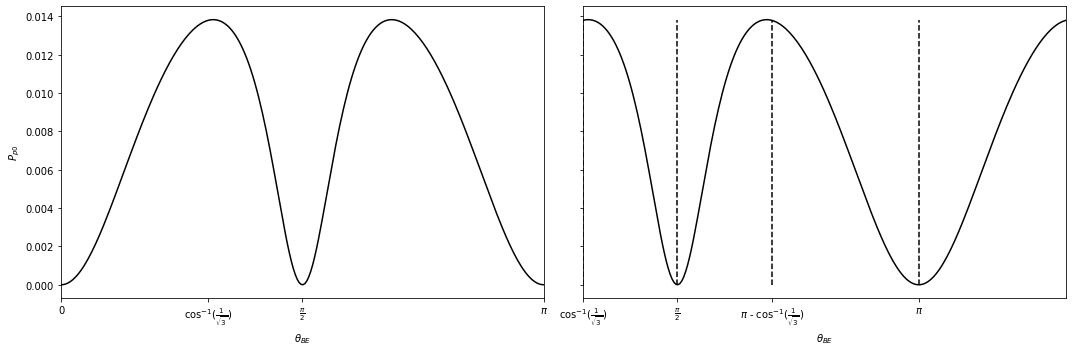

In [4]:
from ion_model import calculate_171_pop, Yb171

yb171 = Yb171()
# define the polarisation sweep
thetaBE370 = np.linspace(0, 2*np.pi, 500)
thetaBE935 = yb171.optimal_thetaBE
# define other constants
s370 = 1                            # At saturation
s935 = 1                            # At saturation
zeeman = 0.5 * yb171.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 0.5 * yb171.Gamma_2P12   # Detuning from excited state by half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman, 
                                                                thetaBE370=thetaBE370, 
                                                                thetaBE935=thetaBE935)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
ax1.plot(mesh.thetaBE370, excited_pop, color='k')
ax1.set_xlim(0, np.pi)
ax1.set_xticks([0, np.arccos(1/np.sqrt(3)), np.pi/2, np.pi])
ax1.set_xticklabels(["0", r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", "$\pi$"])

ax2.plot(mesh.thetaBE370, excited_pop, color='k')
ax2.set_xlim(np.arccos(1/np.sqrt(3)), np.arccos(1/np.sqrt(3))+np.pi)
ax2.set_xticks([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi])
ax2.set_xticklabels([r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", r"$\pi$ - $\cos^{-1}(\frac{1}{\sqrt{3}})$", "$\pi$"])

ax2.vlines([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi], ymin=0, ymax=max(excited_pop), color='k', linestyles='--')

ax1.set_ylabel(r'$P_{p0}$')
ax1.set_xlabel(r'$\theta_{BE}$')
ax2.set_xlabel(r'$\theta_{BE}$')

plt.tight_layout()
plt.show()


### Sweeping saturation parameter $s$ of 370 nm laser ###
In $^{171}Yb^+$ ions, as you increase the saturation parameter $s$ for the 370 nm transition, you can get population trapping (for some reason). Increasing the Zeeman splitting destabilises the trapping. This can be modelled using the following

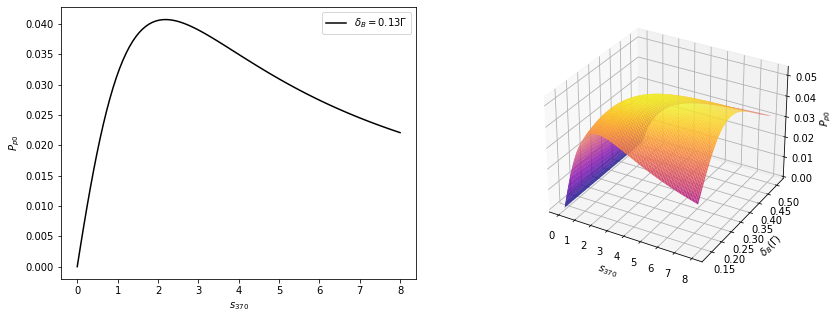

In [5]:
from ion_model import calculate_171_pop, Yb171

yb171 = Yb171()

# define the polarisation sweep
thetaBE370 = yb171.optimal_thetaBE
thetaBE935 = thetaBE370
# define other constants
s370 = np.linspace(0, 8, 100)       # At saturation
s935 = 1                            # At saturation
zeeman = 0.13 * yb171.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi           # Detuning set to -5 MHz

# Calculate the population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman, 
                                                                thetaBE370=thetaBE370, 
                                                                thetaBE935=thetaBE935)

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(mesh.s0_370, excited_pop, color='k', label=r'$\delta_B=0.13\Gamma$')

zeeman = np.linspace(0.13, 0.51, 100)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb171.Gamma_2P12, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(mesh.s0_370, mesh.zeeman / yb171.Gamma_2P12, excited_pop, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
ax2.set_xlabel('$s_{370}$')
ax2.set_ylabel('$\delta_B(\Gamma)$')
ax2.set_zlabel("$P_{p0}$")

ax.set_xlabel('$s_{370}$')
ax.set_ylabel('$P_{p0}$')
ax.legend()

# plt.tight_layout()
plt.show()

Notice in the code for plotting the second graph we used two variables set using np.arrays `s_370` and `zeeman`. When we put these arrays into the `calculate_171_pop` function we get a `mesh` object as the second result. The `mesh` object contains the attributes
```
"thetaBE", 
"detuning", 
"s0_370", 
"s0_935", 
"zeeman"
```
This can be easily printed from the mesh object itself

In [6]:
pprint(list(mesh.__dict__.keys()))

['names',
 'thetaBE370',
 'thetaBE935',
 'detuning370',
 'detuning935',
 's0_370',
 's0_935',
 'zeeman',
 'variables_forming_meshgrid',
 'mesh_order',
 'variables_names',
 'mesh_shape']


Note that `names` is just a holder of the names given above. `mesh_order` and `mesh_shape` can be used to help figure out what axes represents different variables if using multi-dimensional arrays. 

### Sweeping 370 nm detuning $\Delta$ ###
Looking at eq.(1), then it is clear that by sweeping $\Delta$ we get a Lorentzian with a HWHM of $\frac{\Gamma_{171}}{2}$. Changing the detuning can be shown on the Yb grotrian diagram as

<p align="center">
<img src="img/171Yb 370 detuning.png" height="300">
</p>

In this diagram I have drawn the Natural linewidth (not to scale) of the $^2P_{1/2}\: F=0$ in red. The detuning is swept from some negative value to some postive value past the resonance. In reality, going above the resonance would heat the ion and lead to it being lost from the trap. The other two schematics show how changing the Zeeman splitting can lead to a different effective linewidth. 

This can be simulated using the following

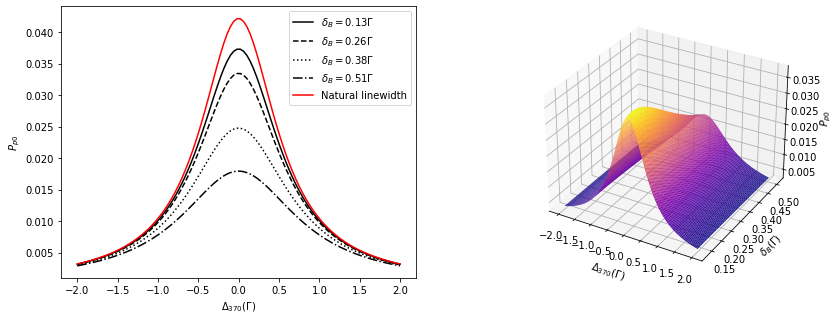

In [7]:
from ion_model import calculate_171_pop, Yb171, Lorentzian

yb171 = Yb171()

# define the polarisation sweep
thetaBE370 = yb171.optimal_thetaBE
thetaBE935 = thetaBE370
# define other constants
s370 = 1                            # At saturation
s935 = 1                            # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = np.linspace(-2, 2, 100) * yb171.Gamma_2P12  # Detuning set to -5 MHz

# Calculate the population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb171.Gamma_2P12, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
linestyles = ['solid', '--', ':', '-.']
for i, det in enumerate(zeeman):
    ax.plot(mesh.detuning370[i, :] / yb171.Gamma_2P12, excited_pop[i, :], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$', linestyle=linestyles[i])
# Also plot natural linewidth of the 2P1/2 F=0 state
Pp0 = yb171.excited_population_no_leakage(other[370]['rabi'], other[370]['linewidth'], mesh.thetaBE370, mesh.detuning370)
# natural_spectrum = Lorentzian(detuning370, 0, yb171.Gamma_2P12) * 10e6
ax.plot(mesh.detuning370[0, :]/yb171.Gamma_2P12, Pp0[0, :], color='r', label='Natural linewidth')


zeeman = np.linspace(0.13, 0.51, 100)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb171.Gamma_2P12,
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(mesh.detuning370 / yb171.Gamma_2P12, mesh.zeeman / yb171.Gamma_2P12, excited_pop, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
ax2.set_xlabel('$\Delta_{370}(\Gamma)$')
ax2.set_ylabel('$\delta_B(\Gamma)$')
ax2.set_zlabel("$P_{p0}$")

ax.set_xlabel('$\Delta_{370}(\Gamma)$')
ax.set_ylabel('$P_{p0}$')
ax.legend()

# plt.tight_layout()
plt.show()

### Sweeping saturation parameter $s_{935}$ of 935 nm laser 

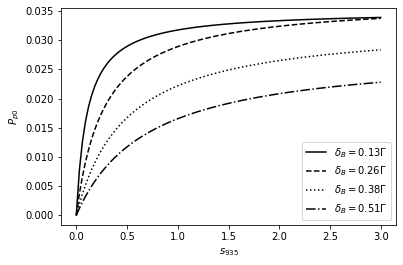

In [8]:
from ion_model import calculate_171_pop, Yb171, Lorentzian

yb171 = Yb171()

# define the polarisation sweep
thetaBE370 = yb171.optimal_thetaBE
thetaBE935 = yb171.optimal_thetaBE
# define other constants
s370 = 1                                # At saturation
s935 = np.linspace(0, 3, 100)           # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi           # Detuning set to -5 MHz

linestyles = ['solid', '--', ':', '-.']

# Calculate the population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb171.Gamma_2P12,
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

for i, det in enumerate(zeeman):
    plt.plot(mesh.s0_935[i, :], excited_pop[i, :], linestyle=linestyles[i], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$')
plt.ylabel('$P_{p0}$')
plt.xlabel('$s_{935}$')
plt.legend()
plt.show()

### Sweeping 935 nm detuning $\Delta_{935}$ 

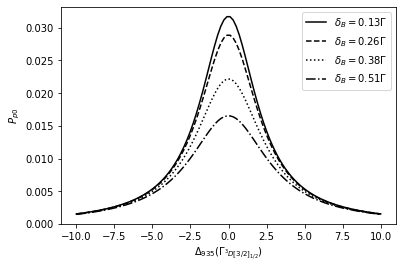

In [9]:
from ion_model import calculate_171_pop, Yb171, Lorentzian

yb171 = Yb171()

# define the polarisation sweep
thetaBE370 = yb171.optimal_thetaBE
thetaBE935 = yb171.optimal_thetaBE
# define other constants
s370 = 1                                # At saturation
s935 = 1                                # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi              # Detuning set to -5 MHz
detuning935 = np.linspace(-10, 10, 100) * yb171.Gamma_3D32

linestyles = ['solid', '--', ':', '-.']

# Calculate the population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning370=detuning370, detuning935=detuning935,
                                                                s_370=s370, 
                                                                s_935=s935, 
                                                                zeeman=zeeman * yb171.Gamma_2P12, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

for i, det in enumerate(zeeman):
    plt.plot(mesh.detuning935[i, :]/yb171.Gamma_3D32, excited_pop[i, :], linestyle=linestyles[i], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$')
plt.ylabel('$P_{p0}$')
plt.xlabel('$\Delta_{935}(\Gamma_{^3D[3/2]_{1/2}})$')
plt.legend()
plt.show()

### Sweeping 935 nm polarisation $\theta_{BE, 935}$ 

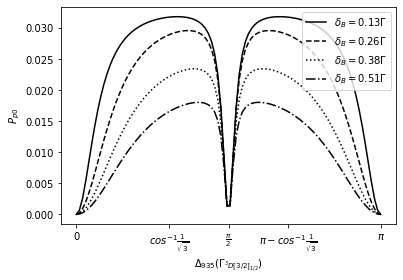

In [10]:
from ion_model import calculate_171_pop, Yb171, Lorentzian

yb171 = Yb171()

# define the polarisation sweep
thetaBE370 = yb171.optimal_thetaBE
thetaBE935 = np.linspace(0, np.pi, 100)
# define other constants
s370 = 1                                # At saturation
s935 = 1                                # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi              # Detuning set to -5 MHz
detuning935 = 0 * yb171.Gamma_3D32

linestyles = ['solid', '--', ':', '-.']

# Calculate the population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning370=detuning370, detuning935=detuning935,
                                                                s_370=s370, 
                                                                s_935=s935, 
                                                                zeeman=zeeman * yb171.Gamma_2P12, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

for i, det in enumerate(zeeman):
    plt.plot(mesh.thetaBE935[i, :], excited_pop[i, :], linestyle=linestyles[i], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$')
plt.ylabel('$P_{p0}$')
plt.xlabel('$\Delta_{935}(\Gamma_{^3D[3/2]_{1/2}})$')
plt.legend(loc='upper right')
plt.xticks([0, thetaBE370, np.pi/2, np.pi-thetaBE370, np.pi],
            ["0", r"$cos^{-1}\frac{1}{\sqrt{3}}$", r"$\frac{\pi}{2}$", r"$\pi -cos^{-1}\frac{1}{\sqrt{3}}$", "$\pi$"])
plt.show()

### $^{174}Yb^+$ structure ###
Because $^{174}Yb^+$ has an even nuclear number, then $I=0$ and there is no Hyperfine splitting. This can be seen in the figures below, where the right figure shows the cooling transitions of $^{174}Yb^+$.

<p align="center">
<img src="img/General Yb structure.PNG" height="300">
<img src="img/Yb174_cooling.PNG" height="300">
</p>

From Ejtemaee, the excited state population is

\begin{equation}
\mathcal{P}_p = \frac{1}{2}\frac{\frac{\Omega^2}{6}}{\Delta^2+\left(\frac{\Gamma_{174}}{2}\right)^2}
\end{equation}

where

\begin{equation}
\left(\frac{\Gamma_{174}}{2}\right)^2 = \frac{\Omega^2}{6}+\frac{\gamma^2}{4}\frac{\left(1+\frac{16\delta_B^2}{9\gamma^2}\right)\left(1 + \frac{64\delta_B^2}{9\gamma^2}\right)}{1 + \frac{16\delta_B^2}{9\gamma^2}(3\cos^2\theta_{BE}+1)}
\end{equation}

is the effective linewidth.

### Polarisation of 370 laser sweep ###

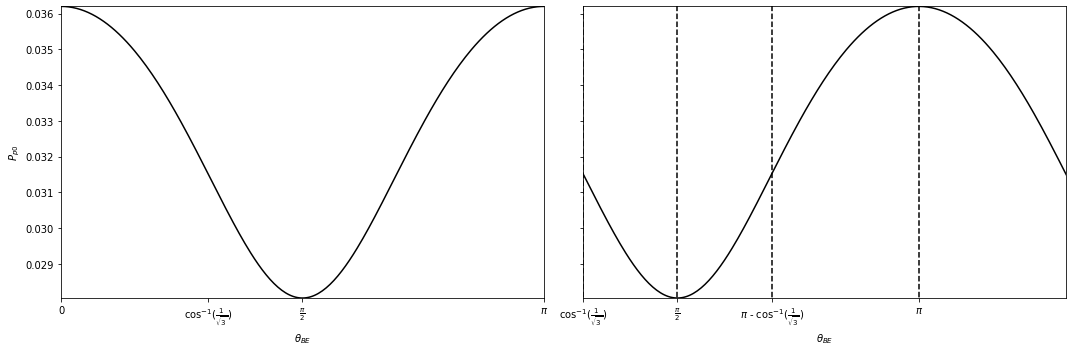

In [11]:
from ion_model import calculate_174_pop, Yb174

yb174 = Yb174()
# define the polarisation sweep
thetaBE370 = np.linspace(0, 2*np.pi, 500)
thetaBE935 = yb174.optimal_thetaBE
# define other constants
s370 = 1                            # At saturation
s935 = 1                            # At saturation
zeeman = 0.5 * yb174.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 0.5 * yb174.Gamma_2P12   # Detuning from excited state by half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb171, cartesian, other = calculate_174_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman, 
                                                                thetaBE370=thetaBE370, 
                                                                thetaBE935=thetaBE935)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
ax1.plot(mesh.thetaBE370, excited_pop, color='k')
ax1.set_xlim(0, np.pi)
ax1.set_xticks([0, np.arccos(1/np.sqrt(3)), np.pi/2, np.pi])
ax1.set_xticklabels(["0", r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", "$\pi$"])

ax2.plot(mesh.thetaBE370, excited_pop, color='k')
ax2.set_xlim(np.arccos(1/np.sqrt(3)), np.arccos(1/np.sqrt(3))+np.pi)
ax2.set_xticks([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi])
ax2.set_xticklabels([r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", r"$\pi$ - $\cos^{-1}(\frac{1}{\sqrt{3}})$", "$\pi$"])

ax2.vlines([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi], ymin=0, ymax=max(excited_pop), color='k', linestyles='--')

ax1.set_ylabel(r'$P_{p0}$')
ax1.set_xlabel(r'$\theta_{BE}$')
ax2.set_xlabel(r'$\theta_{BE}$')
ax1.set_ylim(min(excited_pop), max(excited_pop))

plt.tight_layout()
plt.show()

### Sweeping 370 satuation parameter ###

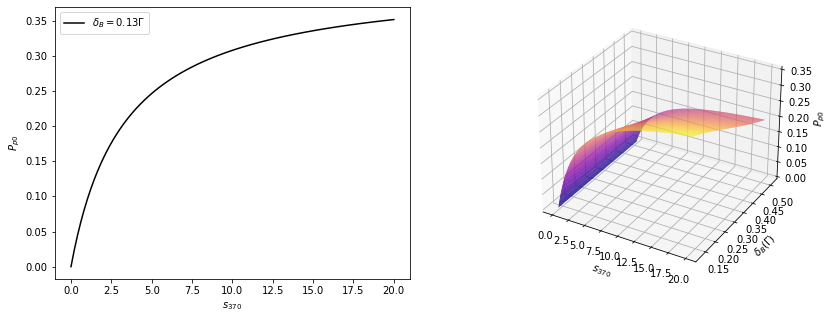

In [12]:
from ion_model import calculate_174_pop, Yb174

yb174 = Yb174()

# define the polarisation sweep
thetaBE370 = yb174.optimal_thetaBE
thetaBE935 = thetaBE370
# define other constants
s370 = np.linspace(0, 20, 100)       # At saturation
s935 = 5                            # At saturation
zeeman = 0.13 * yb174.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi           # Detuning set to -5 MHz

# Calculate the population
excited_pop, mesh, yb174, cartesian, other = calculate_174_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman, 
                                                                thetaBE370=thetaBE370, 
                                                                thetaBE935=thetaBE935)

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(mesh.s0_370, excited_pop, color='k', label=r'$\delta_B=0.13\Gamma$')

zeeman = np.linspace(0.13, 0.51, 100)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb174, cartesian, other = calculate_174_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb171.Gamma_2P12, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(mesh.s0_370, mesh.zeeman / yb171.Gamma_2P12, excited_pop, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
ax2.set_xlabel('$s_{370}$')
ax2.set_ylabel('$\delta_B(\Gamma)$')
ax2.set_zlabel("$P_{p0}$")

ax.set_xlabel('$s_{370}$')
ax.set_ylabel('$P_{p0}$')
ax.legend()

# plt.tight_layout()
plt.show()

### Sweeping 370 nm Detuning

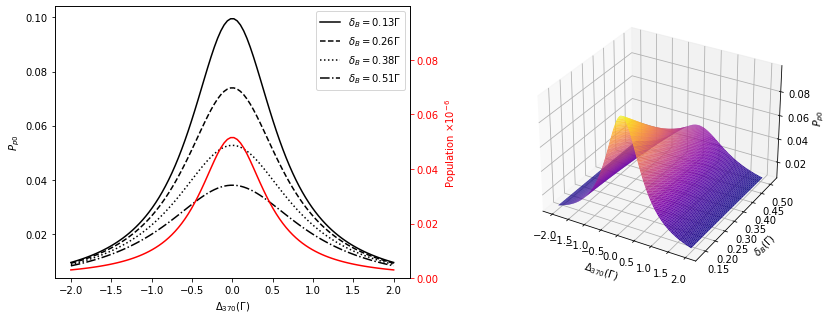

In [13]:
from ion_model import calculate_174_pop, Yb174, Lorentzian

yb174 = Yb174()

# define the polarisation sweep
thetaBE370 = yb174.optimal_thetaBE
thetaBE935 = thetaBE370
# define other constants
s370 = 1                            # At saturation
s935 = 1                            # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = np.linspace(-2, 2, 100) * yb174.Gamma_2P12  # Detuning set to -5 MHz

# Calculate the population
excited_pop, mesh, yb174, cartesian, other = calculate_174_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb174.Gamma_2P12, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
linestyles = ['solid', '--', ':', '-.']
for i, det in enumerate(zeeman):
    ax.plot(mesh.detuning370[i, :] / yb171.Gamma_2P12, excited_pop[i, :], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$', linestyle=linestyles[i])
# Also plot natural linewidth of the 2P1/2 F=0 state
natural_spectrum = Lorentzian(detuning370, 0, yb171.Gamma_2P12) * 10e6
ax_sub = ax.twinx()
natural_line, = ax_sub.plot(detuning370/yb171.Gamma_2P12, natural_spectrum, color='r')
ax_sub.set_ylim(0, np.max(excited_pop))
ax_sub.set_ylabel(r"Population $\times 10^{-6}$")
ax_sub.yaxis.label.set_color(natural_line.get_color())
ax_sub.tick_params(axis='y', colors=natural_line.get_color())


zeeman = np.linspace(0.13, 0.51, 100)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb174, cartesian, other = calculate_174_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb171.Gamma_2P12,
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(mesh.detuning370 / yb171.Gamma_2P12, mesh.zeeman / yb171.Gamma_2P12, excited_pop, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
ax2.set_xlabel('$\Delta_{370}(\Gamma)$')
ax2.set_ylabel('$\delta_B(\Gamma)$')
ax2.set_zlabel("$P_{p0}$")

ax.set_xlabel('$\Delta_{370}(\Gamma)$')
ax.set_ylabel('$P_{p0}$')
ax.legend()

# plt.tight_layout()
plt.show()

### Sweeping saturation parameter $s_{935}$ of 935 nm laser 

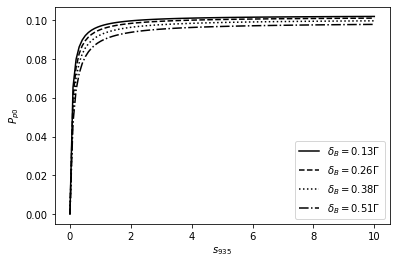

In [14]:
from ion_model import calculate_174_pop, Yb174, Lorentzian

yb174 = Yb174()

# define the polarisation sweep
thetaBE370 = yb174.optimal_thetaBE
thetaBE935 = yb174.optimal_thetaBE
# define other constants
s370 = 1                                # At saturation
s935 = np.linspace(0, 10, 100)           # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi           # Detuning set to -5 MHz

linestyles = ['solid', '--', ':', '-.']

# Calculate the population
excited_pop, mesh, yb174, cartesian, other = calculate_174_pop(detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb174.Gamma_3D32,
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

for i, det in enumerate(zeeman):
    plt.plot(mesh.s0_935[i, :], excited_pop[i, :], linestyle=linestyles[i], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$')
plt.ylabel('$P_{p0}$')
plt.xlabel('$s_{935}$')
plt.legend()
plt.show()

### Sweeping 935 nm detuning $\Delta_{935}$ 

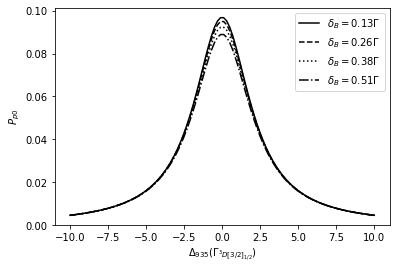

In [15]:
from ion_model import calculate_171_pop, Yb174, Lorentzian

yb174 = Yb174()

# define the polarisation sweep
thetaBE370 = yb174.optimal_thetaBE
thetaBE935 = yb174.optimal_thetaBE
# define other constants
s370 = 1                                # At saturation
s935 = 1                                # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi              # Detuning set to -5 MHz
detuning935 = np.linspace(-10, 10, 100) * yb174.Gamma_3D32

linestyles = ['solid', '--', ':', '-.']

# Calculate the population
excited_pop, mesh, yb174, cartesian, other = calculate_174_pop(detuning370=detuning370, detuning935=detuning935,
                                                                s_370=s370, 
                                                                s_935=s935, 
                                                                zeeman=zeeman * yb174.Gamma_3D32, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

for i, det in enumerate(zeeman):
    plt.plot(mesh.detuning935[i, :]/yb174.Gamma_3D32, excited_pop[i, :], linestyle=linestyles[i], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$')
plt.ylabel('$P_{p0}$')
plt.xlabel('$\Delta_{935}(\Gamma_{^3D[3/2]_{1/2}})$')
plt.legend()
plt.show()

### Sweeping $\theta_{BE, 935}$ of 935 nm laser.

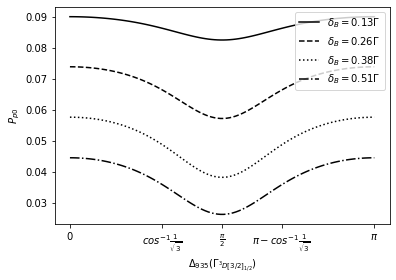

In [16]:
from ion_model import calculate_174_pop, Yb171, Lorentzian

yb174 = Yb174()

# define the polarisation sweep
thetaBE370 = yb171.optimal_thetaBE
thetaBE935 = np.linspace(0, np.pi, 100)
# define other constants
s370 = 1                                # At saturation
s935 = 1                                # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi              # Detuning set to -5 MHz
detuning935 = 0 * yb174.Gamma_3D32

linestyles = ['solid', '--', ':', '-.']

# Calculate the population
excited_pop, mesh, yb174, cartesian, other = calculate_174_pop(detuning370=detuning370, detuning935=detuning935,
                                                                s_370=s370, 
                                                                s_935=s935, 
                                                                zeeman=zeeman * yb174.Gamma_2P12, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

for i, det in enumerate(zeeman):
    plt.plot(mesh.thetaBE935[i, :], excited_pop[i, :], linestyle=linestyles[i], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$')
plt.ylabel('$P_{p0}$')
plt.xlabel('$\Delta_{935}(\Gamma_{^3D[3/2]_{1/2}})$')
plt.legend(loc='upper right')
plt.xticks([0, thetaBE370, np.pi/2, np.pi-thetaBE370, np.pi],
            ["0", r"$cos^{-1}\frac{1}{\sqrt{3}}$", r"$\frac{\pi}{2}$", r"$\pi -cos^{-1}\frac{1}{\sqrt{3}}$", "$\pi$"])
plt.show()

### Fitting experiment to results
In this section I will be showing the fitting code used to fit the modelled data to the experimental data. This will be used to optimise flouresence, and for future Physics Informed Neural Networks.

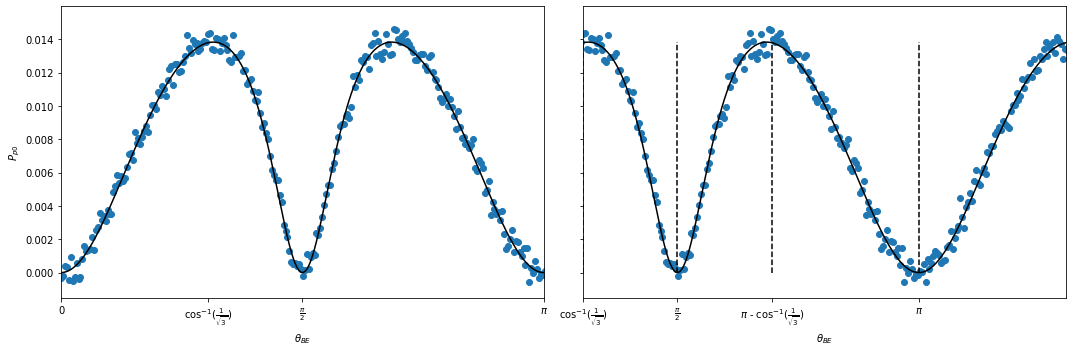

In [17]:
from ion_model import calculate_171_pop, Yb171, GenerateTestData, np, plt

yb171 = Yb171()
# define the True parameters for a polarisation sweep
thetaBE370 = np.linspace(0, 2*np.pi, 500)
thetaBE935 = yb171.optimal_thetaBE
# define other constants
s370 = 1                            # At saturation
s935 = 1                            # At saturation
zeeman = 0.5 * yb171.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 0.5 * yb171.Gamma_2P12   # Detuning from excited state by half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning935 = 0.0

# Calculate the test data
TestData = GenerateTestData(detuning370=detuning370, 
                            s_370=s370, 
                            s_935=s935, 
                            zeeman=zeeman, 
                            thetaBE370=thetaBE370, 
                            thetaBE935=thetaBE935)

# Randomise test data
TestData.randomise(0.0005**2)

# Calculate the True population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman, 
                                                                thetaBE370=thetaBE370, 
                                                                thetaBE935=thetaBE935,
                                                                make_mesh=False)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plot Test data and true
ax1.scatter(TestData.mesh_171.thetaBE370, TestData.excited_pop_171)
ax1.plot(mesh.thetaBE370, excited_pop, color='k')
ax1.set_xlim(0, np.pi)
ax1.set_xticks([0, np.arccos(1/np.sqrt(3)), np.pi/2, np.pi])
ax1.set_xticklabels(["0", r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", "$\pi$"])


ax2.scatter(TestData.mesh_171.thetaBE370, TestData.excited_pop_171)
ax2.plot(mesh.thetaBE370, excited_pop, color='k')
ax2.set_xlim(np.arccos(1/np.sqrt(3)), np.arccos(1/np.sqrt(3))+np.pi)
ax2.set_xticks([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi])
ax2.set_xticklabels([r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", r"$\pi$ - $\cos^{-1}(\frac{1}{\sqrt{3}})$", "$\pi$"])

ax2.vlines([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi], ymin=0, ymax=max(excited_pop), color='k', linestyles='--')

ax1.set_ylabel(r'$P_{p0}$')
ax1.set_xlabel(r'$\theta_{BE}$')
ax2.set_xlabel(r'$\theta_{BE}$')

plt.tight_layout()
plt.show()

['s_370', 'detuning370', 'detuning935', 's_935', 'zeeman', 'thetaBE935']


c:\Users\s5027305\YbSimulations\ion_model.py:47: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(s0 / 2) * gamma


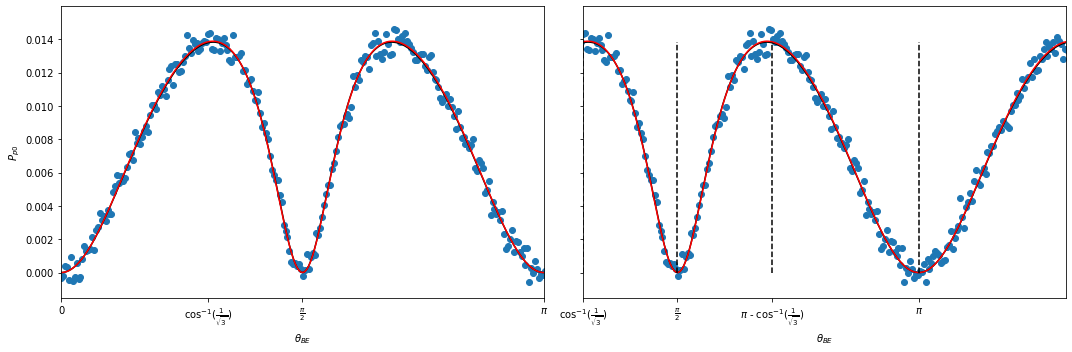

True, fit, Error
s370  1 0.6731480722753447 0.3268519277246553
Detuning 370 (Gamma 2P12)  0.5 0.30372424695439193 0.19627575304560804
Detuning 370 (Gamma 3D32)  0.0 -0.1605464913033545 0.7472349039674648
s935  1 0.7526213111017122 0.24737868889828785
Zeeman (Gamma 2P12)  0.5 0.4006690805046085 0.09933091949539155
thetaBE935 (rad)  0.9553166181245092 1.0745175908718583 0.11920097274734909


In [18]:
# Now lets fit to this test data and compare to the True
from ion_model import FitFreeParams, calculate_171_pop

# The actual data and True parameters is stored in the previous cell. We first have to prepare our data
x = (thetaBE370,)
y = TestData.excited_pop_171
# Var names need to be spelled correctly to work. ValueError will be raised otherwise.
x_var_names = ("thetaBE370",)
yb_model = calculate_171_pop

fitting_tool = FitFreeParams(x, y, x_var_names, yb_model)

# when defining p0 for the fit method, you need to get the order of the parameters correct. You can check this
# by printing FitFreeParams.free_params
print(fitting_tool.free_params)

p0 = [0.9, 5e6 * 2 * np.pi, -0.1e6 * 2 * np.pi, 0.8, 0.4 * yb171.Gamma_2P12, 1]
popt, pcov = fitting_tool.fit(p0=p0)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plot Test data and true
ax1.scatter(TestData.mesh_171.thetaBE370, TestData.excited_pop_171)
ax1.plot(mesh.thetaBE370, excited_pop, color='k')
fitted_population = fitting_tool.fit_func(x, *popt)
ax1.plot(thetaBE370, fitted_population, color='r')
ax1.set_xlim(0, np.pi)
ax1.set_xticks([0, np.arccos(1/np.sqrt(3)), np.pi/2, np.pi])
ax1.set_xticklabels(["0", r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", "$\pi$"])


ax2.scatter(TestData.mesh_171.thetaBE370, TestData.excited_pop_171)
ax2.plot(mesh.thetaBE370, excited_pop, color='k')
ax2.plot(thetaBE370, fitted_population, color='r')
ax2.set_xlim(np.arccos(1/np.sqrt(3)), np.arccos(1/np.sqrt(3))+np.pi)
ax2.set_xticks([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi])
ax2.set_xticklabels([r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", r"$\pi$ - $\cos^{-1}(\frac{1}{\sqrt{3}})$", "$\pi$"])

ax2.vlines([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi], ymin=0, ymax=max(excited_pop), color='k', linestyles='--')

ax1.set_ylabel(r'$P_{p0}$')
ax1.set_xlabel(r'$\theta_{BE}$')
ax2.set_xlabel(r'$\theta_{BE}$')

plt.tight_layout()
plt.show()

print("True, fit, Error")
print("s370 ", s370, popt[0], abs(popt[0] - s370))
print("Detuning 370 (Gamma 2P12) ", detuning370/yb171.Gamma_2P12, popt[1]/yb171.Gamma_2P12, abs(popt[1]-detuning370)/yb171.Gamma_2P12)
print("Detuning 370 (Gamma 3D32) ", detuning935/yb171.Gamma_2P12, popt[2]/yb171.Gamma_2P12, abs(popt[2]-detuning935)/yb171.Gamma_3D32)
print("s935 ", s935, popt[3], abs(popt[3]-s935))
print("Zeeman (Gamma 2P12) ", zeeman/yb171.Gamma_2P12, popt[4]/yb171.Gamma_2P12, abs(popt[4]-zeeman)/yb171.Gamma_2P12)
print("thetaBE935 (rad) ", thetaBE935, popt[5], abs(popt[5]-thetaBE935))



['detuning370', 'detuning935', 's_935', 'zeeman', 'thetaBE935']
True, fit, Error
Detuning 370 (Gamma 2P12)  0.5 0.4872690054206915 0.012730994579308484
Detuning 370 (Gamma 3D32)  0.0 -0.14811674643156375 0.6893828815395004
s935  1 1.0806023871792156 0.08060238717921564
Zeeman (Gamma 2P12)  0.5 0.5327867734288027 0.03278677342880261
thetaBE935 (rad)  0.9553166181245092 1.1209637281934821 0.16564711006897292


c:\Users\s5027305\YbSimulations\ion_model.py:47: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(s0 / 2) * gamma


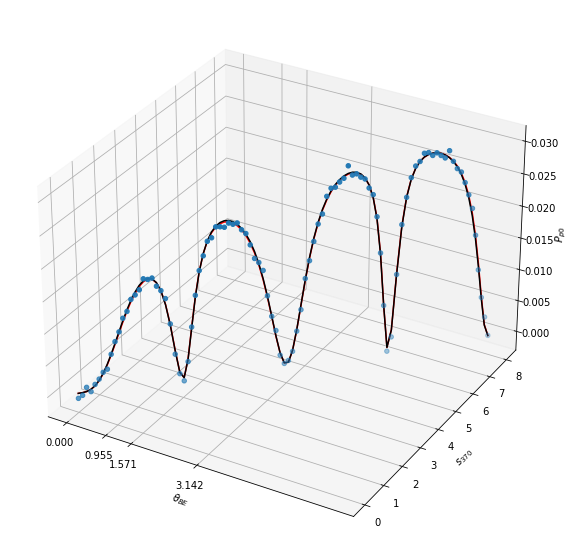

In [19]:
# The accuracy of the fit can be improved by sweeping multiple parameters.

from ion_model import calculate_171_pop, Yb171, GenerateTestData, np, plt, FitFreeParams

yb171 = Yb171()
# define the True parameters for a polarisation sweep
thetaBE370 = np.linspace(0, 2*np.pi, 100)
thetaBE935 = yb171.optimal_thetaBE
# define other constants
s370 = np.linspace(0, 8, 100)       # At saturation
s935 = 1                            # At saturation
zeeman = 0.5 * yb171.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 0.5 * yb171.Gamma_2P12   # Detuning from excited state by half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning935 = 0.0

# Calculate the test data
TestData = GenerateTestData(detuning370=detuning370, 
                            s_370=s370, 
                            s_935=s935, 
                            zeeman=zeeman, 
                            thetaBE370=thetaBE370, 
                            thetaBE935=thetaBE935, 
                            make_mesh=False)

# Randomise test data
TestData.randomise(0.0005**2)

# Calculate the True population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman, 
                                                                thetaBE370=thetaBE370, 
                                                                thetaBE935=thetaBE935,
                                                                make_mesh=False)


# Now lets fit to this test data and compare to the True

# The actual data and True parameters is stored in the previous cell. We first have to prepare our data
x = (thetaBE370, s370)
y = TestData.excited_pop_171
# Var names need to be spelled correctly to work. ValueError will be raised otherwise.
x_var_names = ("thetaBE370", "s_370")
yb_model = calculate_171_pop

fitting_tool = FitFreeParams(x, y, x_var_names, yb_model)

print(fitting_tool.free_params)

p0 = [5e6 * 2 * np.pi, -0.1e6 * 2 * np.pi, 0.8, 0.4 * yb171.Gamma_2P12, 1]
popt, pcov = fitting_tool.fit(p0=p0)

fitted_population = fitting_tool.fit_func(x, *popt)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(projection='3d')
ax1.plot3D(mesh.thetaBE370, mesh.s0_370, fitted_population, color='r')
# Plot Test data and true
ax1.scatter3D(TestData.mesh_171.thetaBE370, TestData.mesh_171.s0_370, TestData.excited_pop_171)
ax1.plot3D(mesh.thetaBE370, mesh.s0_370, excited_pop, color='k')
# ax1.set_xlim(0, np.pi)
ax1.set_xticks([0, np.arccos(1/np.sqrt(3)), np.pi/2, np.pi])

ax1.set_zlabel(r'$P_{p0}$')
ax1.set_ylabel(r'$s_{370}$')
ax1.set_xlabel(r'$\theta_{BE}$')

print("True, fit, Error")
print("Detuning 370 (Gamma 2P12) ", detuning370/yb171.Gamma_2P12, popt[0]/yb171.Gamma_2P12, abs(popt[0]-detuning370)/yb171.Gamma_2P12)
print("Detuning 370 (Gamma 3D32) ", detuning935/yb171.Gamma_2P12, popt[1]/yb171.Gamma_2P12, abs(popt[1]-detuning935)/yb171.Gamma_3D32)
print("s935 ", s935, popt[2], abs(popt[2]-s935))
print("Zeeman (Gamma 2P12) ", zeeman/yb171.Gamma_2P12, popt[3]/yb171.Gamma_2P12, abs(popt[3]-zeeman)/yb171.Gamma_2P12)
print("thetaBE935 (rad) ", thetaBE935, popt[4], abs(popt[4]-thetaBE935))

# plt.tight_layout()
plt.show()

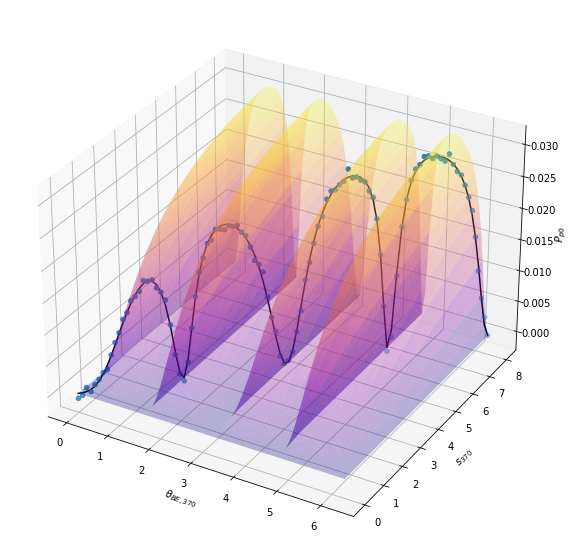

In [20]:
# We can even use these fitted parameters to recalculate our surface
# Calculate the surfaec using fitted params

excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning370=popt[0], s_370=s370, s_935=popt[2], zeeman=popt[3], 
                                                                thetaBE370=thetaBE370, 
                                                                thetaBE935=popt[4],
                                                                detuning935=popt[1],
                                                                make_mesh=True)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(mesh.thetaBE370, mesh.s0_370, excited_pop, cmap='plasma', rstride=1, cstride=1, edgecolor='none', alpha=0.3)
ax.plot3D(thetaBE370, s370, fitted_population, color='k')
ax.scatter3D(TestData.mesh_171.thetaBE370, TestData.mesh_171.s0_370, TestData.excited_pop_171)
ax.set_ylabel('$s_{370}$')
ax.set_xlabel(r'$\theta_{BE, 370}$')
ax.set_zlabel("$P_{p0}$")
plt.show()

### Extract B feild vector
To calculate the B feild vector at the ion, we need to first define the coordinate system. 
The laser beam is assumed to be pointing close to perpendicular to the B feild. The beam is therefore said to travel along the $-\hat{x}$ axis. We want the B-feild to be along the $\hat{z}$ axis, where $\hat{y}$ is perpendicular to the table and pointing up. This is shown in the figure below. The ion is at the origin where the lasers pointing vector, $\bar{B}$ and $\bar{E}$ vectors intersect in the figure. The $\bar{E}$ vector is perpendicular to the lasers pointing vector, and is an angle $\phi_E$ from $\hat{y}$ and $\theta_{BE}$ from $\bar{B}$. We are assuming the electric field is in the $y$-$z$ plane. The $\bar{B}$ vector isn't necessarily aligned with the $\hat{z}$ direction, and is likely pointing in some arbitrary direction.   
<p align="center">
<img src="img/vector_drawing.png" height="300">
</p>

We now hope to calculate the actual vector $\hat{B}$ from the curvefit algorithm. The ion_model package contains a PolarVector class which can be used to define a polar vector, along with methods for converting to cartesian coordinates and calculating the angle between two vectors. Polar vector is defined using conventional spherical polar coordinates

<p align="center">
<img src="img/SphericalCoordinates_1201.png" height="300">
</p>

PolarVector's have built in manipulation methods including

- self.update ; args: r, theta, phi ; update the radius, theta and phi of the vector with new values
- self.rotate_theta_by ; args: radians ; change the angle of theta by an angle
- self.rotate_phi_by ; args: radians ; change the angle of phi by an angle
- self.change_mag ; args: length ; change radius by a length
- self.convert_to_cartesian ; None ; Convert polar to cartesian
- self.rotate_about_x ; args: theta ; Rotate vector about x axis
- self.rotate_about_y ; args: theta ; Rotate vector about y axis
- self.rotate_about_z ; args: theta ; Rotate vector about z axis
- self.translate ; args: translate ; Translates vector in cartesian coordinates by a translation vector
- self.flip ; None ; flips the vector (this needs to be characterised)

In [4]:
from ion_model import PolarVector, CartVector
import numpy as np
from plotly_wrapper import VectorPlot
from pprint import pprint

B = PolarVector(1, np.pi/8, np.pi/12)
E = PolarVector(1, np.pi/2, np.arccos(1/np.sqrt(3)))
laser_pointing = PolarVector(1, 0, np.pi/2)


laser_pointing.flip()
laser_pointing.translate(np.array([[0.3, 0.3], [0, 0], [0, 0]]))
vp = VectorPlot()
vp.add_arc_between_vecs(B, E, line={"color": "purple"}, name="θBE", mode="lines+text", text=["θBE"])
vp.add_vector({'B': B, "E": E, "Cooling laser": laser_pointing},
               {"B": {"line": {"color": "green"}, "text": ["", "B"]}, 
                "E": {"line": {"color": "red"}, "text": ["", "E"]},
                "Cooling laser": {"line": {"color": "blue"}, "text": ["Cooling laser", ""]}})

vp.align_vectors_with_experiment()
fig = vp.plot()

fig.show()
